In [1]:
# import numpy, pandas, seaborn, matplotlib, sklearn just because
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import sklearn 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score ,mean_squared_error, roc_curve, roc_auc_score, classification_report, r2_score, confusion_matrix, f1_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score


# scikitlearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# statsmodels
import statsmodels.api as sm # look at numeric data


import pickle

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('8 31 covid cases vs 2016 election voting.csv')

In [3]:
# assigning region to counties based off of list of states
northeast = ['CT','ME','MA','NH','RI','VT','NJ','NY','PA']
midwest = ['IN','IL','MI','OH','WI','IA','KS','MN','MO','NE','ND','SD']
south = ['DE','DC','FL','GA','MD','NC','SC','VA','WV','AL','KY','MS','TN','AR','LA','OK','TX']
west = ['AZ','CO','ID','NM','MT','UT','NV','WY','AK','CA','HI','OR','WA']

# function to assign regions to states
def get_region(region):
    if region in northeast:
        return 'northeast'
    elif region in midwest:
        return 'midwest'
    elif region in south:
        return 'south'
    elif region in west:
        return 'west'


# create region column
df['region'] = df['State'].apply(lambda x: get_region(x))

In [4]:
df=pd.concat([df, pd.get_dummies(df.region)], axis=1)

In [5]:
df.columns= df.columns.str.lower()

In [6]:
df = df.rename(columns = {"at least bachelors's degree":"at least bachelors degree"})
df = df.rename(columns = {"poverty.rate.below.federal.poverty.threshold":"poverty rate below federal poverty threshold"})

In [7]:
df.columns = df.columns.str.replace(' ', '_')

In [8]:
df = df[['voter_turnout','less_than_high_school_diploma','at_least_high_school_diploma','at_least_bachelors_degree',
         'graduate_degree','school_enrollment','median_earnings_2010','white_(not_latino)_population','african_american_population','native_american_population',
         'asian_american_population','other_race_or_races','latino_population','children_under_6_living_in_poverty','adults_65_and_older_living_in_poverty',
         'population_2016','poverty_rate_below_federal_poverty_threshold','median_age','northeast','south','west','rep_margin_2016','cases/population']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   voter_turnout                                 3112 non-null   float64
 1   less_than_high_school_diploma                 3112 non-null   float64
 2   at_least_high_school_diploma                  3112 non-null   float64
 3   at_least_bachelors_degree                     3112 non-null   float64
 4   graduate_degree                               3112 non-null   float64
 5   school_enrollment                             3112 non-null   float64
 6   median_earnings_2010                          3112 non-null   float64
 7   white_(not_latino)_population                 3112 non-null   float64
 8   african_american_population                   3112 non-null   float64
 9   native_american_population                    3112 non-null   f

In [10]:
df.describe()

,voter_turnout,less_than_high_school_diploma,at_least_high_school_diploma,at_least_bachelors_degree,graduate_degree,school_enrollment,median_earnings_2010,white_(not_latino)_population,african_american_population,native_american_population,...,children_under_6_living_in_poverty,adults_65_and_older_living_in_poverty,population_2016,poverty_rate_below_federal_poverty_threshold,median_age,northeast,south,west,rep_margin_2016,cases/population
count,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,...,3112.000000,3112.000000,3.112000e+03,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
mean,0.443796,16.910460,83.009206,18.995485,6.445292,74.990328,25440.287180,79.062066,8.828679,1.513046,...,24.858644,11.517063,9.781048e+04,15.465071,39.907262,0.069730,0.456941,0.134640,31.919109,0.014407
std,0.083756,7.336384,7.521779,8.654108,3.854331,5.200206,5040.152215,19.313790,14.440366,6.114004,...,11.874050,5.430024,3.124777e+05,6.342830,4.868391,0.254732,0.498223,0.341394,30.817815,0.012778
min,0.000000,0.700000,29.900000,3.700000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,...,0.000000,0.000000,8.100000e+01,0.000000,21.700000,0.000000,0.000000,0.000000,-88.724525,0.000000
25%,0.390570,11.500000,78.400000,13.100000,4.000000,72.350000,22329.791600,68.037500,0.400000,0.150000,...,16.450000,7.700000,1.127150e+04,11.000000,37.100000,0.000000,0.000000,0.000000,14.866991,0.005800
50%,0.443134,15.400000,84.600000,16.800000,5.300000,75.200000,24801.647150,86.525000,1.975000,0.300000,...,23.800000,10.300000,2.600250e+04,14.700000,39.900000,0.000000,0.000000,0.000000,38.217390,0.010800
75%,0.497264,21.600000,88.500000,22.525000,7.700000,77.950000,27530.020875,94.350000,10.075000,0.650000,...,31.750000,14.162500,6.620900e+04,18.950000,42.800000,0.000000,1.000000,0.000000,54.602295,0.019300
max,0.929428,52.100000,99.300000,71.000000,40.600000,100.000000,56674.350800,99.200000,86.100000,85.900000,...,79.650000,45.500000,9.801950e+06,50.600000,62.500000,1.000000,1.000000,1.000000,91.636364,0.143400


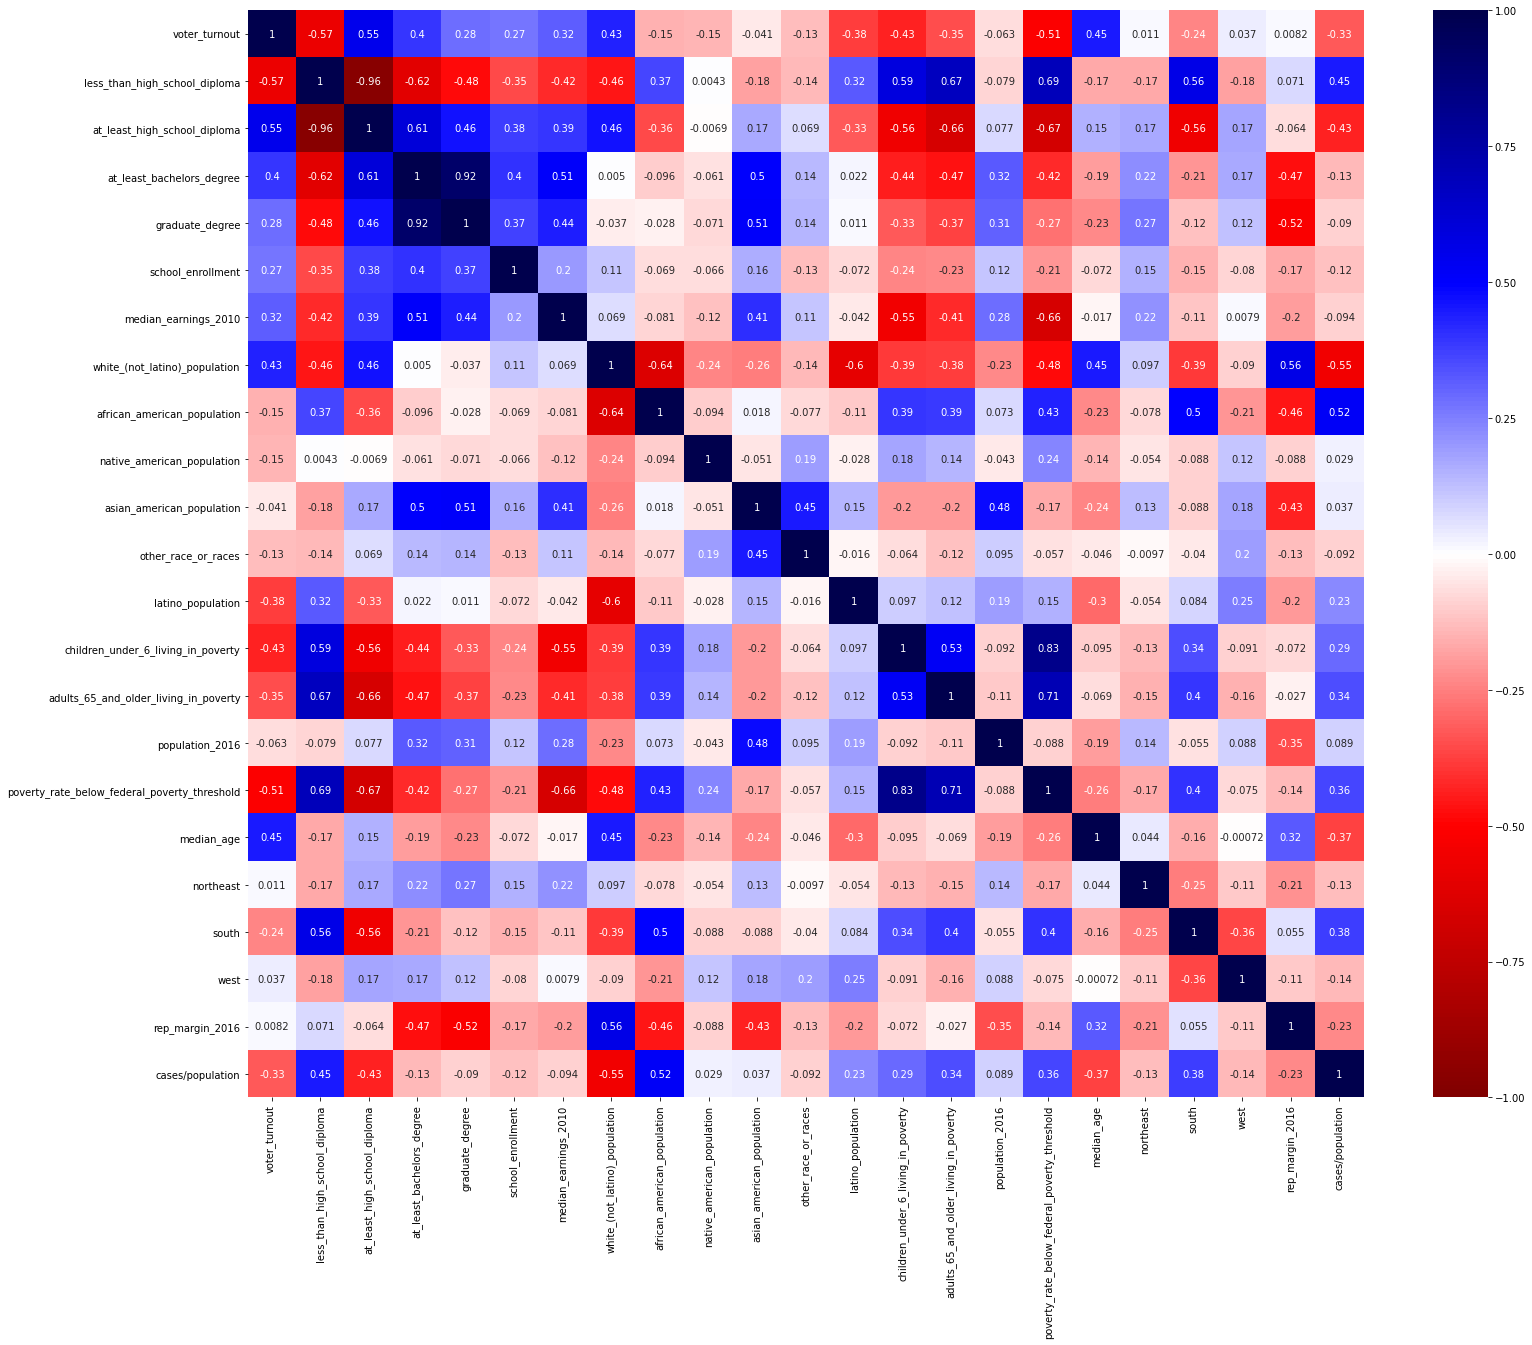

In [11]:
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1);

# Quick OLS

In [12]:
# If y = rep margin 
# X = df.loc[:, ['cases/population', 'at_least_bachelors_degree',
#          'graduate_degree','school_enrollment','median_earnings_2010','white_(not_latino)_population','african_american_population',
#          'asian_american_population','other_race_or_races','latino_population',
#          'population_2016','poverty_rate_below_federal_poverty_threshold','median_age','northeast','south','west','rep_margin_2016']]
# y = df['rep_margin_2016']

In [13]:
X = df.loc[:, ['voter_turnout','less_than_high_school_diploma','at_least_high_school_diploma','at_least_bachelors_degree',
         'graduate_degree','school_enrollment','median_earnings_2010','white_(not_latino)_population','african_american_population','native_american_population',
         'asian_american_population','other_race_or_races','latino_population','children_under_6_living_in_poverty','adults_65_and_older_living_in_poverty',
         'population_2016','poverty_rate_below_federal_poverty_threshold','median_age','northeast','south','west','rep_margin_2016','cases/population']]
y = df['cases/population']

In [14]:
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       cases/population   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.801e+26
Date:                Thu, 10 Sep 2020   Prob (F-statistic):                        0.00
Time:                        00:27:51   Log-Likelihood:                          94321.
No. Observations:                3112   AIC:                                 -1.886e+05
Df Residuals:                    3089   BIC:                                 -1.885e+05
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
voter_turnout                                -4.324e-16   5.84e-15     -0.074      0.941   -1.19e-14     1.1e-14
less_than_high_school_diploma                -1.802e-18   1.74e-16     -0.010      0.992   -3.43e-16    3.39e-16
at_least_high_school_diploma                  -1.83e-18    1.6e-16     -0.011      0.991   -3.16e-16    3.13e-16
at_least_bachelors_degree                     2.819e-18   1.19e-16      0.024      0.981    -2.3e-16    2.35e-16
graduate_degree                              -2.494e-18   2.34e-16     -0.011      0.991    -4.6e-16    4.55e-16
school_enrollment                            -1.491e-19   6.74e-17     -0.002      0.998   -1.32e-16    1.32e-16
median_earnings_2010                          2.217e-20   9.86e-20      0.225      0.822   -1.71e-19    2.16e-19
white_(not_latino)_population                  2.48e-18   1.74e-16      0.014      0.989   -3.39e-16    3.44e-16
african_american_population                   1.887e-18   1.76e-16      0.011      0.991   -3.43e-16    3.47e-16
native_american_population                    1.681e-18   1.84e-16      0.009      0.993    -3.6e-16    3.63e-16
asian_american_population                    -9.487e-20   2.82e-16     -0.000      1.000   -5.52e-16    5.52e-16
other_race_or_races                          -1.762e-18   2.33e-16     -0.008      0.994   -4.58e-16    4.55e-16
latino_population                             1.623e-18   1.71e-16      0.009      0.992   -3.34e-16    3.38e-16
children_under_6_living_in_poverty           -4.845e-19   4.88e-17     -0.010      0.992   -9.61e-17    9.51e-17
adults_65_and_older_living_in_poverty        -1.525e-19   9.15e-17     -0.002      0.999   -1.79e-16    1.79e-16
population_2016                              -5.134e-20   1.14e-21    -44.999      0.000   -5.36e-20   -4.91e-20
poverty_rate_below_federal_poverty_threshold -2.439e-19   1.41e-16     -0.002      0.999   -2.77e-16    2.77e-16
median_age                                     2.67e-18   8.66e-17      0.031      0.975   -1.67e-16    1.73e-16
northeast                                    -2.602e-17   1.37e-15     -0.019      0.985   -2.71e-15    2.66e-15
south                                         4.337e-18   9.82e-16      0.004      0.996   -1.92e-15    1.93e-15
west                                         -7.318e-18   1.08e-15     -0.007      0.995   -2.12e-15    2.11e-15
rep_margin_2016                              -9.444e-20   1.79e-17     -0.005      0.996   -3.52e-17     3.5e-17
cases/population                                 1.0000   3.12e-14    3.2e+13      0.000       1.000       1.000
==============================================

## X1 - Feature engineering with split_and_validate begins, to test features

In [15]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [16]:
X = df.loc[:, ['voter_turnout','less_than_high_school_diploma','at_least_high_school_diploma','at_least_bachelors_degree',
         'graduate_degree','school_enrollment','median_earnings_2010','white_(not_latino)_population','african_american_population','native_american_population',
         'asian_american_population','other_race_or_races','latino_population','children_under_6_living_in_poverty','adults_65_and_older_living_in_poverty',
         'population_2016','poverty_rate_below_federal_poverty_threshold','median_age','northeast','south','west','rep_margin_2016','cases/population']]
y = df['cases/population']

split_and_validate(X, y)


Validation R^2 score was: 1.0
Feature coefficient results: 

voter_turnout : 0.00
less_than_high_school_diploma : 0.00
at_least_high_school_diploma : 0.00
at_least_bachelors_degree : 0.00
graduate_degree : -0.00
school_enrollment : 0.00
median_earnings_2010 : 0.00
white_(not_latino)_population : 0.00
african_american_population : 0.00
native_american_population : 0.00
asian_american_population : 0.00
other_race_or_races : 0.00
latino_population : 0.00
children_under_6_living_in_poverty : -0.00
adults_65_and_older_living_in_poverty : -0.00
population_2016 : -0.00
poverty_rate_below_federal_poverty_threshold : 0.00
median_age : -0.00
northeast : -0.00
south : 0.00
west : 0.00
rep_margin_2016 : -0.00
cases/population : 1.00
